# Интерполяция многочленами

Интерполяционный многочлен легко сконструировать: возьмем многочлены степени $n$ $l_0(x), \ldots, l_n(x)$, удовлетворяющие следующим условиям:
$$
l_j(x_i) = \left\{
\begin{array} {l}
1, \, i=j \\
0, \, i \ne j
\end{array}
\right. 
$$
Тогда 
$$
L_n(x) = \sum_{j=0}^n f(x_j) l_j(x)
$$

Эти многочлены удобны тем, что легко получить общую формулу для них:
$$
l_j(x) = \prod_{k = 0, \, k \ne j}^n \frac{x - x_k}{x_j - x_k}
$$
Их называют *многочленами Лагранжа* или базовыми многочленами.

**Задача 1**  

0. Напишите программу для вычисления многочленов Лагранжа в любой точке по узлам интерполяции $x_1,\ldots, x_n$. Постройте графики нескольких многочленов на подробной сетке, символами покажите значения в точках интерполяции.

2. Подсчитайте число операций для вычисления интерполяционного многочлена в точке, если используются формула 
$$
L_n(x) = \sum_{j=0}^n f(x_j) l_j(x)
$$
и ваша программа для многочленов Лагранжа.

**Задача 2**  
Обозначим 
$$ 
w(x) = \prod_{k = 0}^{n} (x-x_k)
$$
Докажите, что
$$
l_j(x) = \frac{w(x)}{(x-x_j) w'(x_j)}
$$

**Задача 3**
1. На основе предыдущей формулы придумайте алгоритм для вычисления интерполяционного многочлена в точке $x$ за $O(n)$ операций, где $n$ - число точек (при этом некоторые величины, не зависящие от $x$ могут вычисляться предварительно)

2. Запрограммируйте этот способ, и постройте график интерполяционного многочлена вместе с графиком исходной функции и точками интерполяции.  
(*Обратите внимание, что при $x = x_j$ может возникнуть деление на 0, поэтому может понадобиться соответствующая проверка*)


## Погрешность интерполяции

$$
\begin{align}
f(x) - L_n(x) = \frac{f^{(n+1)} \left(\xi(x)\right) }{(n+1)!} \omega(x), \quad \omega(x) = \prod_{k=0}^n (x-x_k)
\end{align}
$$
$$f(x) - L_n(x) = f(x; x_0;\ldots;x_n) \omega(x), \quad f(x_0;\ldots;x_k) = \sum_{j=0}^{k} \frac{f(x_j)}{\displaystyle \prod_{\substack{l=0 \\ l \ne j}}^k (x_j - x_l)}$$
**Задача 4:**  
Функция $e^x$ интерполируется на отрезке $[0,1]$ многочленом 2-й степени на равномерной сетке. Оцените погрешность интерполяции.

**Задача 5:**  
Докажите, что на равномерной сетке норма многочлена $\omega(x) = \prod_{k=0}^{n} (x - x_k)$ $\approx$ $n! \left(\frac{b-a}{n}\right)^{n+1} \frac{1}{\sqrt{n}}$



[1.         0.5        0.375      ... 0.00564267 0.00564239 0.00564211]
0.000572713609882124


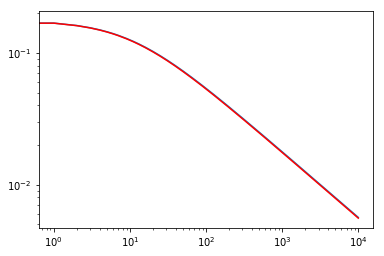

In [61]:
n = 10000
prod = np.zeros(n)
prod[0] = 1
for k in range(1,n):
    prod[k] = prod[k-1] * (k-1/2)/k
print(prod)
plt.loglog(prod[10::])
plt.loglog(prod[10] * (np.arange(10,n)/10)**-0.5, 'r-')
print(np.linalg.norm((prod[10::] - prod[10] * (np.arange(10,n)/10)**-0.5)/np.linalg.norm(prod[10::]), np.inf))

2.787165070462604e-29


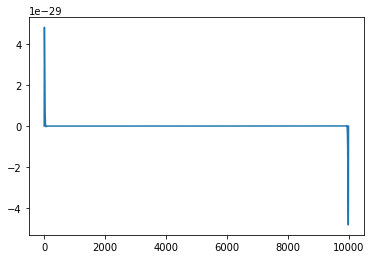

In [59]:
xx = np.linspace(-1,1,10000)
om = np.ones(10000)
M = 200
for n in [M]:
        for k in range(n+1):
            om  = om * (xx - (-1 + 2*k/n))
        plt.plot(om)
print(np.sqrt(2*np.pi) * 2**(M+1) / np.exp(M) / n /2)

**Задача 6:**  
С помощью готовой реализации (код ниже) посчитайте ошибку интерполяции для функции $e^x$ многочленом 2-й степени на равномерной сетке. Сравните с теоретической оценкой из задачи 4.


1.0


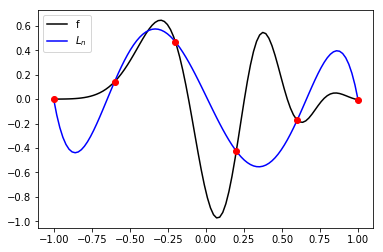

In [10]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: np.sin(4*(x+1)**2) * np.exp(-x**2/0.25)
n = 6
xi = np.linspace(-1,1,n) # Узлы интерполяции
yi = f(xi) # Значения в узлах
lagrange = BarycentricInterpolator(xi,yi)
x = np.linspace(-1,1,100)
y = lagrange.__call__(x)

plt.plot(x, f(x), 'k-', label = 'f')
plt.plot(xi, yi,'ro')
plt.legend()

xmax = np.amax(x) # Так можно найти максимальный элемент в массиве
print(xmax)

## Регуляризация

* Интерполяционный многочлен, может сильно "колебаться" между узлами интерполяции. Из-за этого точность приближения становится плохой. Вспомним решение задачи интерполяции через МНК:
$$
\Vert Ac - y \Vert_2 \to \min
$$
где $A$ - матрица Вандермонда, $c$ - вектор коэффициентов, $y$ - значения функции в узлах интерполяции.  
Мы подбираем коэффициенты многочлена так, что ошибка узлах была минимальной.   
* Идея регуляризации: добавим в функционал ошибки "штраф" за очень большие коэффициенты многочлена (большие по модулю коэффициенты и будут приводить к "колебаниям"):
$$
\Vert Ac - y \Vert_2^2 + \alpha \Vert c \Vert_2^2 \to \min
$$
где $\alpha > 0 $ - параметр регуляризации. 

**Задача 7:**  
Выведите формулу для решения регуляризованной задачи, для этого приравняйте к нулю градиент функционала $(Ac - y, Ac - y) + \alpha(c,c)$.

**Задача 8:**  
Запрограммируйте решение регуляризованной задачи. Постройте графики многочленов для $\alpha = 10^0, 10^{-1}, 10^{-2}, 10^{-3}$ для функции Рунге $f(x) = \frac{1}{25 x^2 + 1}$ на $[-1,1]$.   
Возьмите степень многочлена на 1 меньше, чем число точек (чтобы без регуляризации значения интерполировались точно)

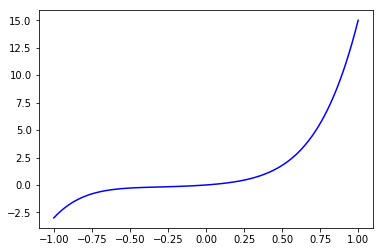

In [11]:
## Решение задачи интерполяции с регуляризацией
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: 1/(25*x**2 + 1) # Попробуйте другие функции
n = 6
x = np.linspace(-1,1,n)
y = f(x)
A = np.vander(x, n, increasing = True)

#
# Ваш код здесь
#

#np.linalg.solve # решение линейной системы

# Для построения графиков многочлена с коэффициентами c[:]
# можно использовать следующий код
c = np.arange(n)
xx = np.linspace(-1,1,100)
V_plot = np.vander(xx, n, increasing = True)
yy = V_plot @ c # Значения многочлена в точках xx
plt.plot(xx,yy,'b-')

## Оптимальные узлы

**Задача 9:** Сравните погрешности при представлении функции $f \in C^{\infty}$ на отрезке $[a,b]$
1. Многочленом Тейлора $n$-й степени
2. Интерполяционным многочленом $L_n$ по узлам в нулях многочлена Чебышева.

**Задача 10:**
Возьмите любую $f \in C^{\infty}$ на отрезке $[-1,1]$, для которой есть простая формула для многочлена Тейлора в какой-нибудь точке $x_0 \in [-1,1]$. Используя код в следующей ячейке, постройте на разных рисунках графики ошибки при приближении функции
1. Многочленом Тейлора $n$-й степени
2. Интерполяционным многочленом $L_n$ по узлам в нулях многочлена Чебышева.  

для разных $n$.

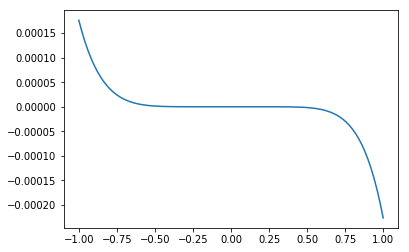

In [53]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
import math
from matplotlib import pyplot as plt

#
# Так вычисляются значения многочлена
#
f = lambda x: np.sin(4*(x+1)**2) * np.exp(-x**2/0.25)
n = 6
xi = np.linspace(-1,1,n) # Узлы интерполяции - поменяйте на узлы Чебышева
yi = f(xi) # Значения в узлах
lagrange = BarycentricInterpolator(xi,yi)
N = 100
x = np.linspace(-1,1,N)
f_p = lagrange(x) # Значения многочлена на подробной сетке

#
# Так можно вычислить значения многочлена Тейлора
#
f_t = np.zeros(N)
x_0 = 0 # Точка, относительно которой делаем разложение
for k in range(n+1):
    dkf = 1 # Значения k-й производной в точке x_0
    f_t = f_t + dkf / math.factorial(k) * (x - x_0)**k

plt.plot(x, f_t -np.exp(x))